# Youtube Views Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import missingno as msno
warnings.filterwarnings('ignore')

%matplotlib inline

# Load and Describe Data

-----

## Load Data

In [2]:
dfraw = pd.read_excel('https://drive.google.com/uc?export=download&id=1PM7QCDK0WRfXJOmVCzmHSouFzgiUmzNT')
dfraw.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
34725,2018-06-03,Rajeev Masand review of Veere Di Wedding,Rajeev Masand,22,11:30:09,"Rajeev Masand|""review""|""Veere Di Wedding""|""Son...",243648,1740,6605,562,False,False,False,CNN News18 film critic Rajeev Masand reviews t...,16,253,40,2018-06-01
3186,2017-12-01,Audition Gone Wrong Ft. Ashish Chanchlani | Mo...,MostlySane,23,05:30:00,"prajakta koli|""mostly sane""|""mostlysane""|""late...",486946,25582,1187,1623,False,False,False,"Hey dumdums this was such a fun collaboration,...",33,937,54,2017-11-30
232,2017-11-15,"Zameer: Aarsh Benipal, Harsimran (Teaser) Rele...",T-Series Apna Punjab,10,08:49:16,"zameer|""zameer harsimran""|""zameer aarsh benipa...",160856,2983,134,114,False,False,False,Presenting latest punjabi song Zameer teaser b...,17,556,63,2017-11-14
25171,2018-04-05,ಟಿ ವಿ 9 ನಿರೂಪಕ ರಂಗನಾಥ್ ಗೆ ಬಂದಿರೋ ಕಾಯಿಲೆ ನೋಡಿದರ...,SANDALWOOD REVIEWS,24,12:12:39,"TV 9 ranganath|""TV 9 anchor hospitalised""|""TV ...",109329,143,113,55,False,False,False,ಟಿ ವಿ 9 ನಿರೂಪಕ ರಂಗನಾಥ್ ಗೆ ಬಂದಿರೋ ಕಾಯಿಲೆ ನೋಡಿದರ...,9,91,91,2018-04-04
14305,2018-02-01,Chammak Chandra Performance | Extra Jabardasth...,ETV Jabardasth,22,20:12:05,"etv shows|""eenadu television""|""padutha theeyag...",1937784,6749,1006,663,False,False,False,"A comedy show, in which comedians like Sudigaa...",35,587,81,2018-01-26


## Data Exploration

In [3]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

1. There are 36,791 entries and 18 columns.  
2. The `trending_date` and `publish_time` are highly recommended to be changed to datetime data type.
3. The `No_tags` column should be changed to lowercase to make it easier to mention variables.

In [4]:
# COnvert the column into lowercase
dfraw.columns = dfraw.columns.str.lower()

In [5]:
# Checking null value
dfraw.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
no_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

Only one column has null value. Amazing!  

In [6]:
# Checking duplicated rows
dfraw.duplicated().sum()

4229

Our dataset has a lot of duplicate rows.

In [7]:
# Categorize the features
num = ['category_id','views', 'likes', 'dislikes', 'comment_count', 'no_tags', 'desc_len', 'len_title']
cat = ['trending_date', 'channel_title','publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# Limits the numbers after comma to only 3 numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfraw[num].describe()

,category_id,views,likes,dislikes,comment_count,no_tags,desc_len,len_title
count,36791.000,36791.000,36791.000,36791.000,36791.000,36791.000,36791.000,36791.000
mean,21.552,1071490.259,27450.694,1685.363,2714.022,18.938,923.079,70.609
std,6.587,3207149.048,97831.295,16197.317,14978.114,9.844,815.039,22.409
min,1.000,4024.000,0.000,0.000,0.000,1.000,3.000,5.000
25%,23.000,125604.000,879.000,109.000,83.000,12.000,368.000,53.000
50%,24.000,307836.000,3126.000,331.000,336.000,19.000,677.000,74.000
75%,24.000,806631.500,14095.000,1032.000,1314.500,25.000,1237.000,91.000
max,43.000,125432237.000,2912710.000,1545017.000,827755.000,72.000,5136.000,100.000


Notes :  

1. Numerical features do not have null values.
2. The min-max values are too extreme, except for `no_tags` and `len_title` which may still be reasonable.
3. The mean-median values for the `views`, `likes`, `dislikes`, and `comment_count` features are very far apart. This may be because of some trending videos.
4. It is necessary to check features at extreme values

In [8]:
dfraw[cat].describe()

,trending_date,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791,36791,36791,36791,36791
unique,205,1390,12375,12463,2,2,2
top,2017-12-23,VikatanTV,04:30:00,[none],False,False,False
freq,199,284,333,1120,35611,36034,36780


1. In the `tags` column there are no values that most frequently appear. This may be caused by various types of tag writing.
2. We can see that there are not many videos that have comments disabled or rating disabled or videos that have errors or have been deleted. It can be seen that almost all values are False.

------

# Exploratory Data Analysis

-------

## Univariate Analysis

### Unique Value From Features

In [9]:
dfraw['category_id'].unique()

array([ 1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29,  2, 15, 20, 30])

In [10]:
dfraw['title'].sample(5)

10642    UP पुलिस का ये दरोगा बनेगा काजल राघवानी का पति...
7604     Nani on MCA, issues with Sai Pallavi, why he m...
7288     Official Trailer: Sonu Ke Titu Ki Sweety | Luv...
30875    Hyper Aadi, Raising Raju Performance | Jabarda...
6297     Gulaebaghavali - Album Preview | Prabhu Deva, ...
Name: title, dtype: object

In [11]:
dfraw['trending_date'].sample(5)

7676     2017-12-25
31108    2018-05-14
34634    2018-06-02
22209    2018-03-20
22718    2018-03-22
Name: trending_date, dtype: object

In [12]:
dfraw['channel_title'].sample(5)

25760    ETV Jabardasth
2246     Magical Nuskhe
23168            And TV
2074        Put Chutney
22942       Volga Video
Name: channel_title, dtype: object

In [13]:
dfraw['tags'].sample(5)

28451    khajurbhai|"live show of khajurbhai"|"khajurbh...
7290     rahul bhoj|"filmy yaara"|"salman khan"|"katrin...
24121    zee marathi|"tv"|"television"|"soap"|"episode"...
5006     Malayalam Film songs|"Malayalam Latest songs"|...
31525    #Mahanati|"Director Nag Ashwin Interview"|"Nag...
Name: tags, dtype: object

These YouTube videos seems to come from a YouTuber in India, we can see a lot of Hindi writing. From the sample above, it can also be seen that there is a lot of non-uniformity, starting from different languages, lower/upper case, title length, etc.

### Outliers

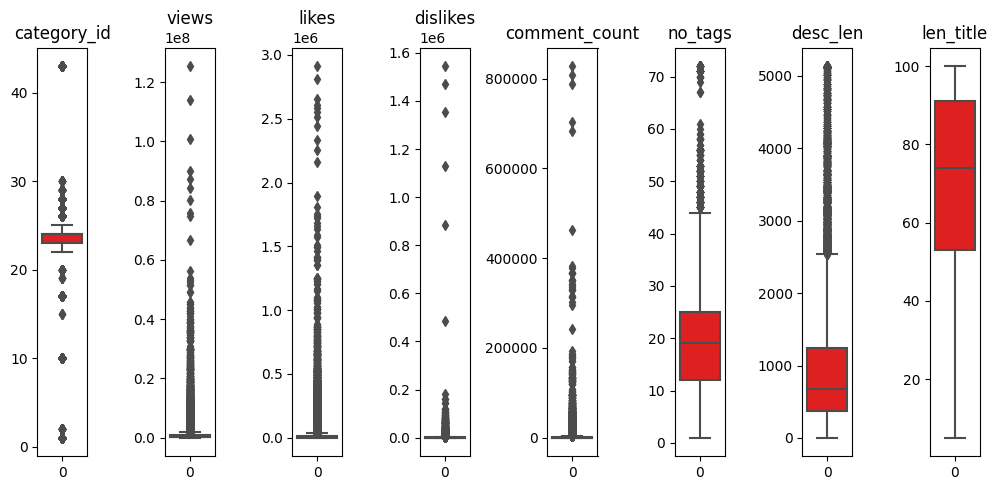

In [14]:
plt.figure(figsize=(10, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfraw[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Almost all of numerical features have extreme outliers.

### Data Distribution

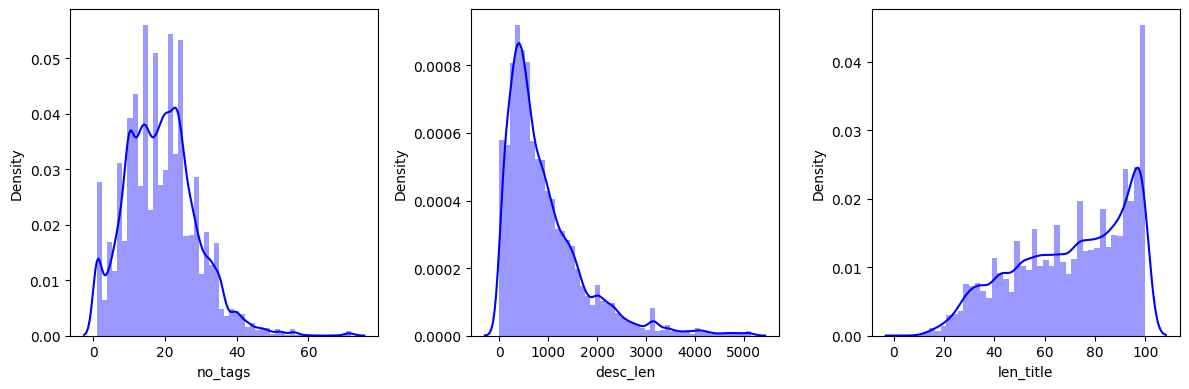

In [15]:
sub1 = ['no_tags', 'desc_len', 'len_title']

plt.figure(figsize=(12, 4))
for i in range(0, len(sub1)):
    plt.subplot(1, 3, i+1)
    sns.distplot(dfraw[sub1[i]], color='blue')
    plt.tight_layout()

The `no_tags` column has the best data distribution among the three above.
The `desc_len` column is right-skewed while the `len_title` column is the opposite, left-skewed.

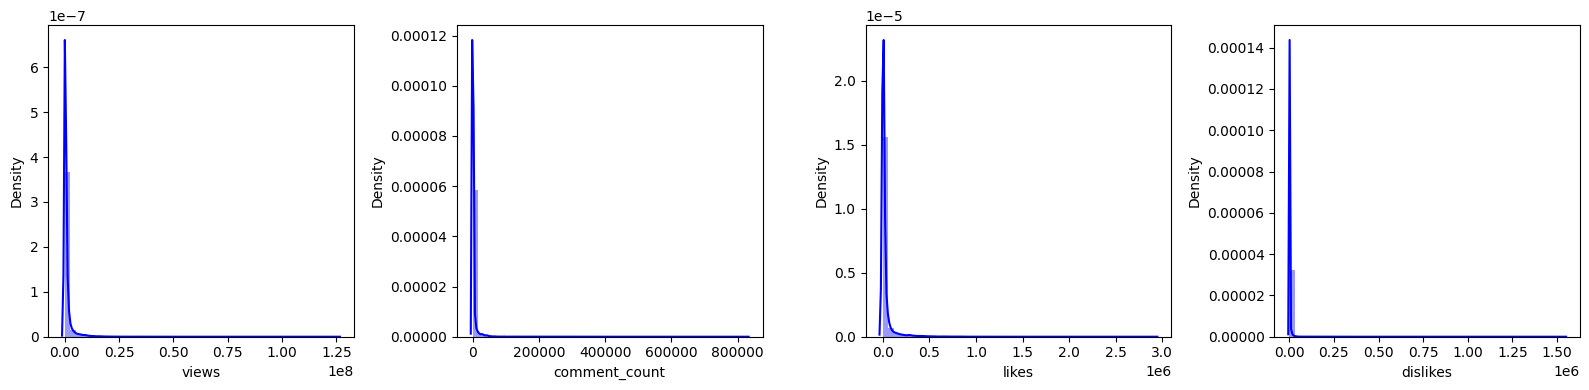

In [16]:
sub2 = ['views', 'comment_count', 'likes', 'dislikes']

plt.figure(figsize=(16, 4))
for i in range(0, len(sub2)):
    plt.subplot(1, 4, i+1)
    sns.distplot(dfraw[sub2[i]], color='blue')
    plt.tight_layout()

The graphs of the 'views', 'comment_count', 'likes', and 'dislikes' features show non-Gaussian distribution of data as seen from the very spiky graph.

In [17]:
from scipy.stats import kurtosis
print(f"Kurtosis Co-efficient Likes: {round(dfraw.likes.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Dislikes: {round(dfraw.dislikes.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Views: {round(dfraw.views.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Comment Count: {round(dfraw.comment_count.kurtosis(), 3)}")

Kurtosis Co-efficient Likes: 193.855
Kurtosis Co-efficient Dislikes: 6294.719
Kurtosis Co-efficient Views: 254.932
Kurtosis Co-efficient Comment Count: 1110.641


Leptokurtic kurtosis. The kurtosis level is very high. This may be caused by extreme outliers but is normal in YouTube trending (not an input error).

### Check Extreme Value

If we look at the graph, one of outliers come from the number of 'views' starting from 4 million and above.

In [18]:
# Checking rows with extreme viewers
extreme= dfraw.sort_values(['views'], ascending = False).reset_index(drop='index')
extreme.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
0,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",37,710,50,2017-12-06
1,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811216,1470387,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",37,710,50,2017-12-06
2,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656672,1353650,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",37,710,50,2017-12-06
3,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,11,448,55,2017-11-29
4,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584674,52176,341571,False,False,False,There was an idea… Avengers: Infinity War. In ...,11,448,55,2017-11-29


The video "YouTube Rewind: The Shape of 2017" published by the "YouTube Spotlight" channel became the video with the most views, with a total of 125,432,237 views.

Factors that may explain why this video has such a high number of views: This video is part of the annual "YouTube Rewind" series released by the official YouTube channel. These videos typically summarize and commemorate popular content and events that occurred during the year on the YouTube platform. Since this is an official video from YouTube itself, many users are interested in seeing how YouTube summarizes the events of the year.

In [19]:
# Checking rows with the least views
extreme= dfraw.sort_values(['views'], ascending = True).reset_index(drop='index')
extreme.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
0,2018-05-01,"Baapmanus - बापमाणूस - Episode 118 - May 01, ...",Zee Yuva,24,23:28:11,"Zee Yuva|""Baapmanus""|""full episode""|""Marathi""|...",4024,15,0,0,False,False,False,"To watch FULL episode of Baapmanus, CLICK here...",10,1001,60,2018-04-30
1,2018-05-01,रट लो//1 मई 2018 Current Affairs PDF and Quiz...,Golden Era Education,27,02:15:08,[none],4287,312,12,100,False,False,False,download today pdf- https://www.goldeneraeduca...,1,84,100,2018-05-01
2,2018-03-06,Madhuban Murli LIVE - 6/3/2018 (Tuesday 7.00am...,Madhuban Murli Brahma Kumaris,27,02:41:50,"Daily Murli|""Brahma Kumaris""|""Madhuban""|""Omsha...",4359,191,18,9,False,False,False,Murli classes are held daily at all centers at...,7,386,61,2018-03-06
3,2018-02-22,Madhuban Murli LIVE - 22/2/2018 (Thursday 7.00...,Madhuban Murli Brahma Kumaris,27,02:44:05,"Daily Murli|""Brahma Kumaris""|""Madhuban""|""Omsha...",4641,185,15,5,False,False,False,Murli classes are held daily at all centers at...,7,386,63,2018-02-22
4,2017-12-11,Dilip Ghosh and Firhad Hakim's political fight...,24 ghanta,24,14:21:49,"Zee 24 ghanta|""bangla news""|""zee bangla news""|...",5098,37,5,10,False,False,False,To satisfy the demands of high-rise favourites...,27,411,65,2017-12-10


Just like extreme values with lots of views, the same thing also happens to values with a small number of 'views', where this also affects the number of 'likes' and 'dislikes'.

## Multivariate Analysis

### Correlation Heatmap

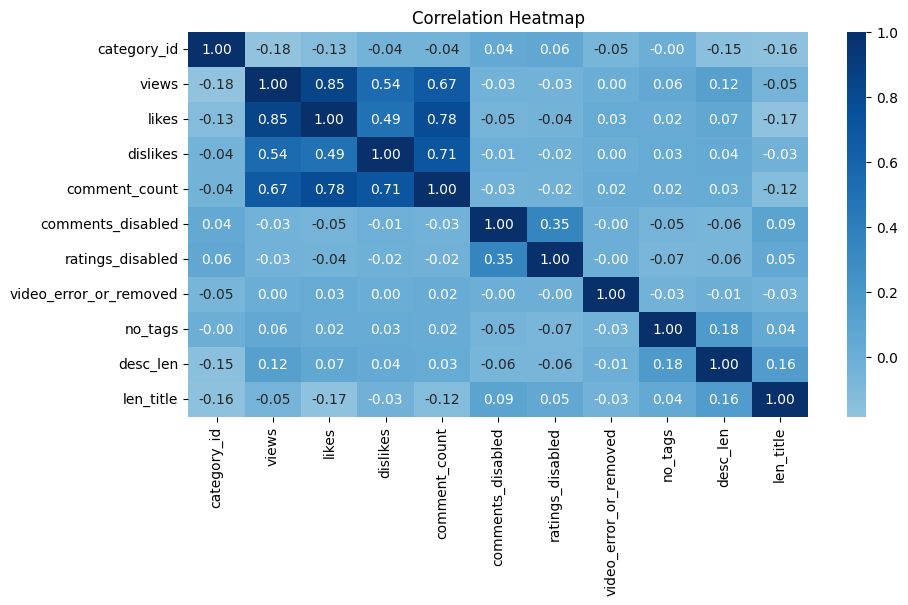

In [20]:
# Heatmap correlation
corr_matrix = dfraw.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Based on the heatmap above, there are several conclusions we can draw, including:

* The `likes` feature has a high correlation value (0.85).
* Apart from `likes` there are `dislikes` and `comment_count` which have high values but are not redundant.
* `dislikes` has a correlation value of 0.54 (positive correlation) where the more views the more dislikes.
* `comment_count` has a correlation number of 0.67, which is a positive correlation.
* `comments_disabled` and `ratings_disabled` also show a fairly good correlation.

### Feature and Target Correlation

<Figure size 2400x800 with 0 Axes>

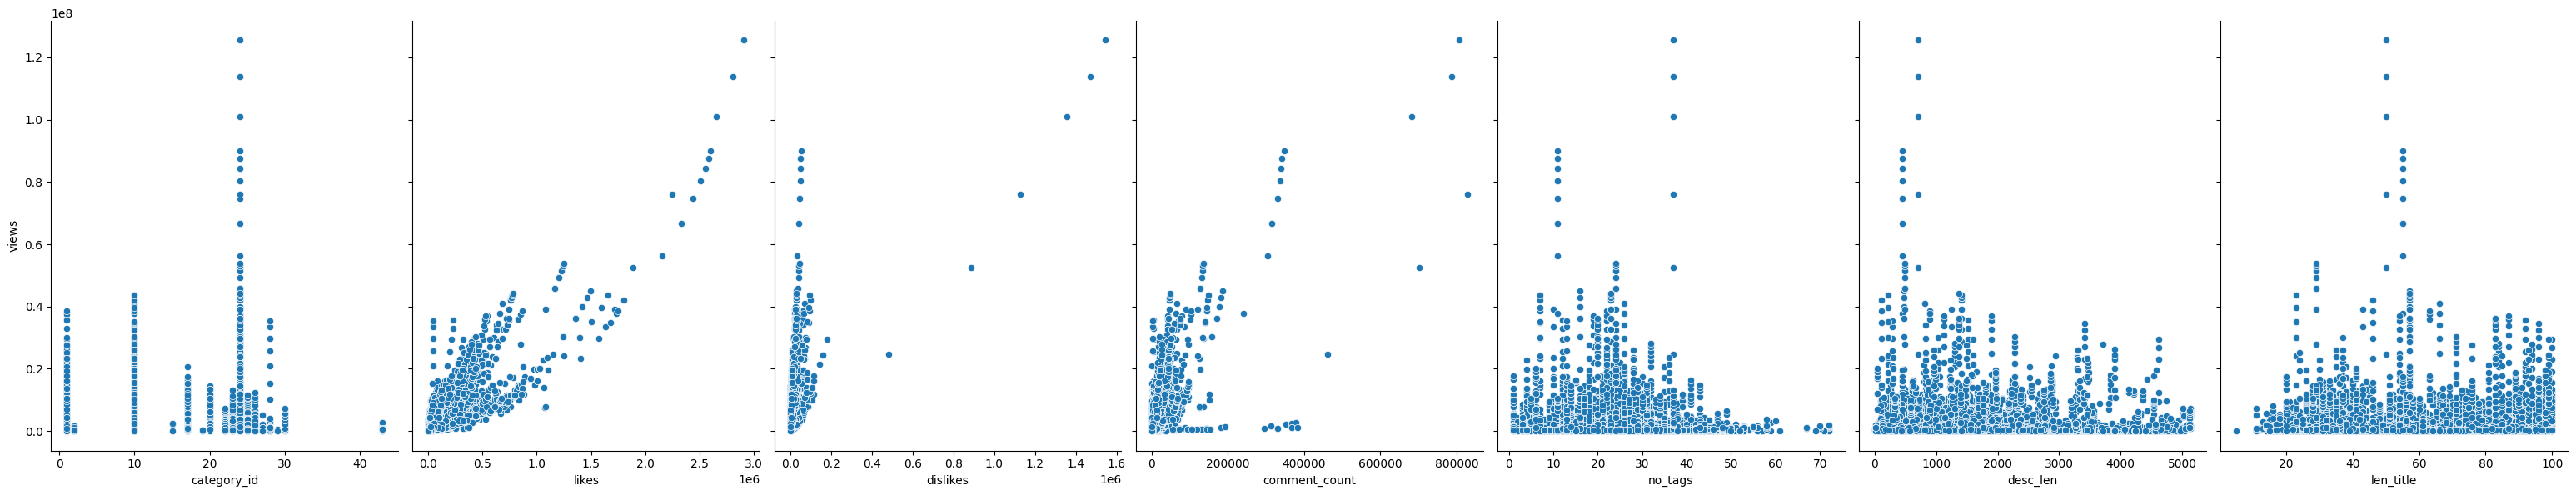

In [21]:
# Pairplot to see the correlation with the target: views
plt.figure(figsize=(24,8))
fig = sns.pairplot(data=dfraw, x_vars=['category_id','likes','dislikes','comment_count','no_tags','desc_len','len_title'], y_vars=['views'], height=6, aspect=0.75);
fig.tight_layout();

It can be seen that the higher the views, the higher the number of likes, dislikes and comments. Meanwhile, for the number of tags, description length and video title length, most of the numbers are evenly distributed but tend to only have around 0-2 million views.

### Category ID and Target Correlation

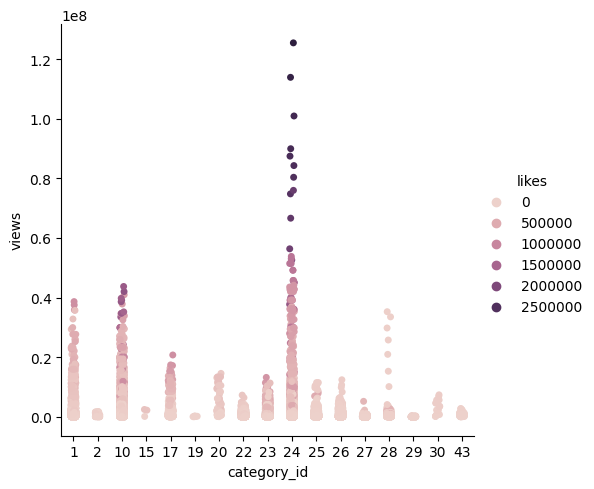

In [22]:
# Visualization

sns.catplot(data=dfraw, x='category_id', y='views', hue='likes')

From this graph we can conclude that content categories that have a high number of views tend to have a high number of likes and only some content can get a very high number of views compared to other content.

-------

# Data Preparation

-----

## Data Cleaning

### Drop Columns

**Duplicated Rows**

In Data Exploration, the dataset was recorded as having 4229 duplicate data, so we had to delete them.

In [23]:
# Delete duplicated rows
dfraw = dfraw.drop_duplicates(keep='first')

print(f'Jumlah duplikat: {dfraw.duplicated().sum()}')

Jumlah duplikat: 0


**Irrelevant Features**

Some features seem less relevant and their unique value is too broad, as we have analyzed previously. So it is assumed that these features do not have a particular pattern. These features are `title`, `channel_title`, `publish_time`, `tags`, `description` which will be removed.

In [24]:
dfraw = dfraw.drop(['title', 'channel_title', 'publish_time', 'tags', 'description'], axis=1)
dfraw.head(3)

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,no_tags,desc_len,len_title,publish_date
0,2017-11-14,1,1096327,33966,798,882,False,False,False,15,920,81,2017-11-12
1,2017-11-14,25,590101,735,904,0,True,False,False,19,2232,58,2017-11-13
2,2017-11-14,24,473988,2011,243,149,False,False,False,14,482,58,2017-11-12


### Missing Values

As mentioned during the Data Exploration process, missing data (Null) was only found in the `description` column, although this make sense because sometimes there are video owners who don't write anything in the video description column. However, because this is irrelevant features and has been removed, there is no need to handle missing values.

### Handling Outliers

In [25]:
df_cleansing = dfraw.copy()

In [26]:
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    column_name = df.columns[column]
    total_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    percent_outliers = round(((total_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Total outliers in ', column_name, ' :', total_outliers, ' and outliers percentage:', percent_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('Check the input')

In [27]:
column = [2, 3, 4, 5, 9, 10, 11]

for i in range(0, len(column)):
    outlier_del(df_cleansing, column[i], 'summary')

Total outliers in  views  : 3733  and outliers percentage: 11.46 %
Total outliers in  likes  : 4955  and outliers percentage: 15.22 %
Total outliers in  dislikes  : 3899  and outliers percentage: 11.97 %
Total outliers in  comment_count  : 4222  and outliers percentage: 12.97 %
Total outliers in  no_tags  : 400  and outliers percentage: 1.23 %
Total outliers in  desc_len  : 1604  and outliers percentage: 4.93 %
Total outliers in  len_title  : 0  and outliers percentage: 0.0 %


In [28]:
# Delete columns contains outliers below 5%
df_cleansing = df_cleansing[df_cleansing.index.isin(outlier_del(dfraw, 9, 'df').reset_index()['index'])]
df_cleansing = df_cleansing[df_cleansing.index.isin(outlier_del(dfraw, 10, 'df').reset_index()['index'])]
df_cleansing.shape

(30567, 13)

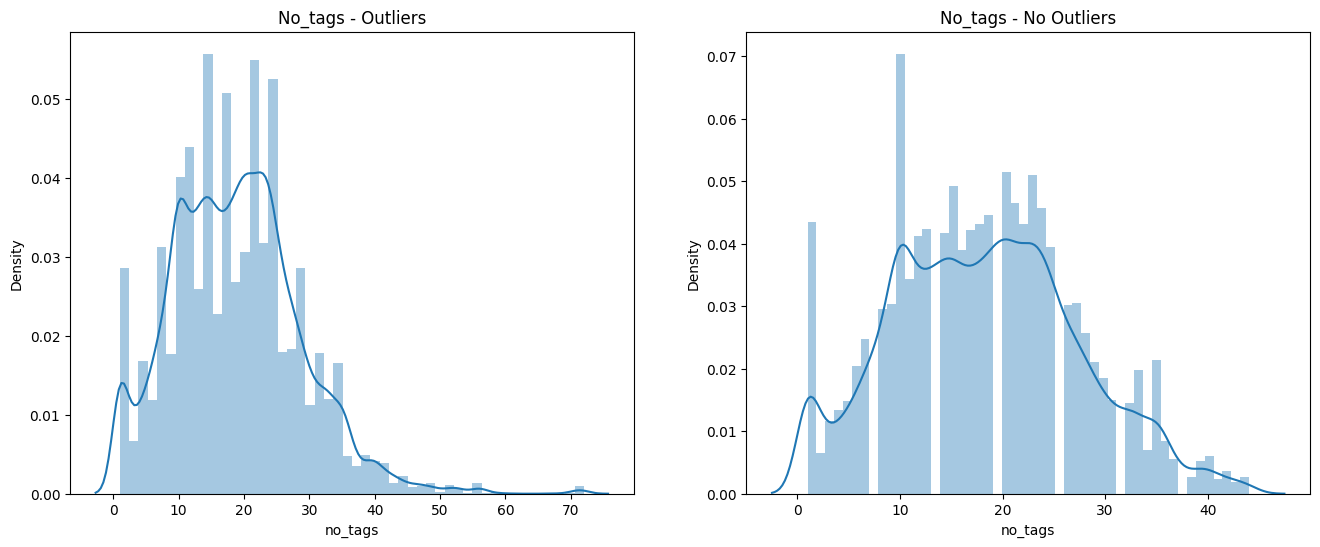

In [29]:
# Create a plot to compare before after removing outliers
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(dfraw.no_tags)
plt.title('No_tags - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_cleansing.no_tags)
plt.title('No_tags - No Outliers')
plt.show()

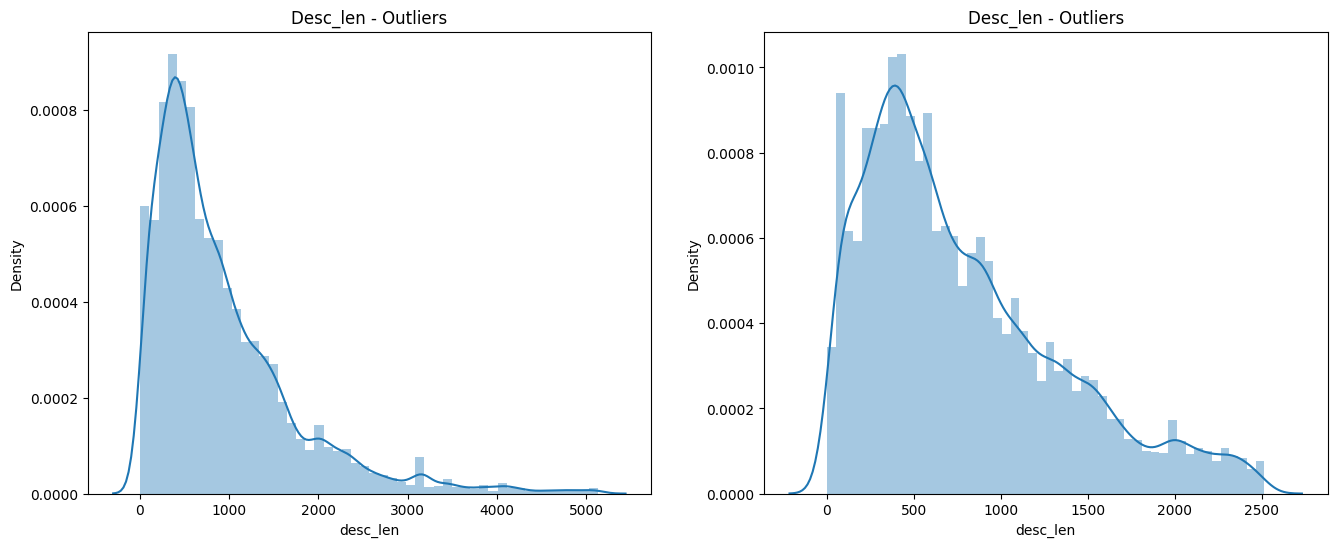

In [30]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(dfraw.desc_len)
plt.title('Desc_len - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_cleansing.desc_len)
plt.title('Desc_len - Outliers')
plt.show()

## Data Preparation

### Feature Engineering

For feature extraction we can extract publish_date to make is_weekend column, it checks whether a video published on the weekend or not.

In [31]:
df_cleansing['publish_date'] = df_cleansing['publish_date'].astype(str)
df_cleansing['publish_date'].head()

0    2017-11-12
1    2017-11-13
2    2017-11-12
3    2017-11-12
4    2017-11-13
Name: publish_date, dtype: object

In [32]:
timeget = []
for i in df_cleansing['publish_date'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)

In [33]:
df_cleansing['publish_date'] =  pd.to_datetime(timeget)
df_cleansing['day_of_week'] = df_cleansing['publish_date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [34]:
def is_weekend(dmap):
    if dmap.weekday() < 5:
        return False
    else:
        return True
df_cleansing['is_weekend'] = df_cleansing['publish_date'].apply(is_weekend)

df_cleansing.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,no_tags,desc_len,len_title,publish_date,day_of_week,is_weekend
0,2017-11-14,1,1096327,33966,798,882,False,False,False,15,920,81,2017-11-12,6,True
1,2017-11-14,25,590101,735,904,0,True,False,False,19,2232,58,2017-11-13,0,False
2,2017-11-14,24,473988,2011,243,149,False,False,False,14,482,58,2017-11-12,6,True
3,2017-11-14,23,1242680,70353,1624,2684,False,False,False,20,263,30,2017-11-12,6,True
4,2017-11-14,24,464015,492,293,66,False,False,False,11,753,88,2017-11-13,0,False


## Train & Test Split

In [35]:
df = df_cleansing.copy()

In [36]:
X = df[['category_id','likes','dislikes','comment_count','no_tags','desc_len','len_title','is_weekend','comments_disabled', 'ratings_disabled','video_error_or_removed']]
y = df[['views']]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [38]:
# Membuat data train dan data test
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

## Pre-Processing

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
std_train = scaler.fit_transform(data_train)
std_test = scaler.transform(data_test)

# Mengembalikan nilai ke dataframe
std_train = pd.DataFrame(std_train, columns=data_train.columns)
std_test = pd.DataFrame(std_test, columns=data_test.columns)

In [40]:
Xtrain_std = std_train.drop('views', axis=1)
ytrain_std = std_train.views
Xtest_std = std_test.drop('views', axis=1)
ytest_std = std_test.views

-------

# Modelling and Evaluation

------

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(Xtrain_std, ytrain_std)

LinearRegression()

In [42]:
y_pred = regressor.predict(Xtest_std)
y_pred

array([-0.27248438, -0.71361815,  0.58504945, ...,  1.65944806,
        0.15559526,  0.27570455])

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, y_pred, Xtrain_std, Xtest_std, ytrain_std,  ytest_std):
    print("MAE: " , mean_absolute_error(ytest_std, y_pred))
    print("RMSE: " , mean_squared_error(ytest_std, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest_std, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

eval_regression(regressor, y_pred, Xtrain_std, Xtest_std, ytrain_std, ytest_std)

MAE:  1.0182084920223005
RMSE:  2.4987435575336683
R2 score:  0.7921504243943231
Coefficients:  [-0.03957449  0.48146453  0.05185217 -0.04392103  0.21807887  0.16912098
  0.57794471 -0.12336288  0.01510298  0.10611628 -5.58105512]
Intercept:  0.08295190234329941


-----

## Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(Xtrain_std, ytrain_std)

DecisionTreeRegressor()

In [45]:
y_pred = dt_regressor.predict(Xtest_std)
y_pred

array([-0.25068148, -0.30586383, -0.02260139, ...,  0.5776183 ,
        0.40489872,  2.95645174])

In [46]:
# Evaluasi Decision Tree Regression
eval_regression(dt_regressor, y_pred, Xtrain_std, Xtest_std, ytrain_std, ytest_std)

MAE:  0.5022174912290052
RMSE:  1.633842446121845
R2 score:  0.9111359471428687
Coefficients:  [-0.03957449  0.48146453  0.05185217 -0.04392103  0.21807887  0.16912098
  0.57794471 -0.12336288  0.01510298  0.10611628 -5.58105512]
Intercept:  0.08295190234329941


---

## Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1)
rf_regressor.fit(Xtrain_std, ytrain_std)

RandomForestRegressor(max_depth=50, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [48]:
# Predict
ytrain_pred = rf_regressor.predict(Xtrain_std)
ytest_pred = rf_regressor.predict(Xtest_std)

In [49]:
def evaluasi(model, ytrain_pred, ytest_pred, Xtrain_std, Xtest_std, ytrain_std,  ytest_std):
    print("MAE train: " , mean_absolute_error(ytrain_std, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest_std, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain_std, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest_std, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain_std, ytrain_pred))
    print('R2 score test: ', r2_score(ytest_std, ytest_pred))

evaluasi(rf_regressor, ytrain_pred, ytest_pred, Xtrain_std, Xtest_std, ytrain_std, ytest_std)

MAE train:  0.14618340471907207
MAE test:  0.3907736743178035
RMSE train:  0.43985222889969405
RMSE test:  1.2023947522444172
R2 score train:  0.9923585933885923
R2 score test:  0.9518717676121906


---

## XG Boost

In [50]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(Xtrain_std, ytrain_std)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# Predict
ytrain_pred = xgb_regressor.predict(Xtrain_std)
ytest_pred = xgb_regressor.predict(Xtest_std)

In [52]:
def evaluasi(model, ytrain_pred, ytest_pred, Xtrain_std, Xtest_std, ytrain_std,  ytest_std):
    print("MAE train: " , mean_absolute_error(ytrain_std, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest_std, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain_std, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest_std, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain_std, ytrain_pred))
    print('R2 score test: ', r2_score(ytest_std, ytest_pred))

evaluasi(xgb_regressor, ytrain_pred, ytest_pred, Xtrain_std, Xtest_std, ytrain_std, ytest_std)

MAE train:  0.2709644467530069
MAE test:  0.43017068227576133
RMSE train:  0.7782484610569705
RMSE test:  1.698447712856565
R2 score train:  0.9760780677083705
R2 score test:  0.9039692920846277


### Evaluation

Text(0.5, 1.0, 'Feature Importance Score')

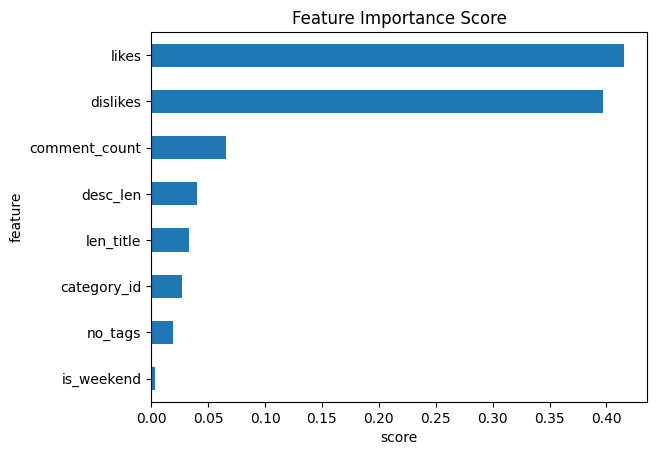

In [53]:
feat_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(8).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

----------

# Conclusion

1. From modeling results that have been carried out on the YouTube Statistics dataset to predict the number of views, we can conclude that the best model is **Random Forest** which gives an R2 Score: 0.95 and small MAE and RMSE values (0.39 and 1.2). This means that the model shows good performance in predicting targets.

2. The second best model is the Decision Tree model with R2 Score: 0.91 and MAE and RMSE values which are not much different from Random Forest model (0.4 and 1.61). This shows that a suitable method is by using ensemble learning-Bagging.

3. Recommendations that can be given to increase the number of views are:
      * From publication time, we can publish the video on weekends, which has an influence on increasing the number of views. If this is done, we will most likely obtain significant results :  
          A. The number of views will increase  
          B. If the number of views increases, the number of likes, dislikes and comments will automatically increase.  
          C. If there are more and more of these things, the YouTube algorithm will detect the video as a trending video.  

      * Don't disable comments and ratings. From the data analysis, it can be seen that if comments or ratings disabled, then someone's interest in watching the video will also decrease, so the number of interactions with the video will also decrease.
      * Category of content also affects the number of views. Choose the category that the audience often likes, then adjust the tags (both title tags and number of tags) with good proportions.